<a href="https://colab.research.google.com/github/Hariharapanda-Deepak/Bankmarketingeffectivenessprediction/blob/main/Bankmarketingeffectivenessprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
#importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from numpy import math

In [6]:
# Mounting Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
# Importing Data
path='/content/drive/MyDrive/classification project/'
df=pd.read_csv(path + 'bank-full.csv',sep=';')

In [8]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [9]:
df['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [10]:
df['marital'].unique()

array(['married', 'single', 'divorced'], dtype=object)

In [11]:
df['education'].unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [12]:
df['default'].unique()

array(['no', 'yes'], dtype=object)

In [13]:
df['housing'].unique()

array(['yes', 'no'], dtype=object)

In [14]:
df['loan'].unique()

array(['no', 'yes'], dtype=object)

In [15]:
df['balance'].unique()

array([ 2143,    29,     2, ...,  8205, 14204, 16353])

In [16]:
df['contact'].unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

In [17]:
df['duration'].unique()

array([ 261,  151,   76, ..., 1298, 1246, 1556])

In [18]:
df['campaign'].unique()

array([ 1,  2,  3,  5,  4,  6,  7,  8,  9, 10, 11, 12, 13, 19, 14, 24, 16,
       32, 18, 22, 15, 17, 25, 21, 43, 51, 63, 41, 26, 28, 55, 50, 38, 23,
       20, 29, 31, 37, 30, 46, 27, 58, 33, 35, 34, 36, 39, 44])

In [19]:
df['pdays'].unique()

array([ -1, 151, 166,  91,  86, 143, 147,  89, 140, 176, 101, 174, 170,
       167, 195, 165, 129, 188, 196, 172, 118, 119, 104, 171, 117, 164,
       132, 131, 123, 159, 186, 111, 115, 116, 173, 178, 110, 152,  96,
       103, 150, 175, 193, 181, 185, 154, 145, 138, 126, 180, 109, 158,
       168,  97, 182, 127, 130, 194, 125, 105, 102,  26, 179,  28, 183,
       155, 112, 120, 137, 124, 187, 190, 113, 162, 134, 169, 189,   8,
       144, 191, 184, 177,   5,  99, 133,  93,  92,  10, 100, 156, 198,
       106, 153, 146, 128,   7, 121, 160, 107,  90,  27, 197, 136, 139,
       122, 157, 149, 135,  30, 114,  98, 192, 163,  34,  95, 141,  31,
       199,  94, 108,  29, 268, 247, 253, 226, 244, 239, 245, 204, 231,
       238, 258, 230, 254, 265,  71, 223, 246, 250, 266, 240, 205, 261,
       259, 241, 260, 234, 251, 225, 161, 237, 262, 248, 255, 220, 227,
       206, 224, 249, 235, 228, 263,   2, 270, 232, 252, 207, 200, 269,
       233, 256, 273, 272, 242, 264, 208, 214, 222, 271, 203, 22

In [20]:
df['previous'].unique()

array([  0,   3,   1,   4,   2,  11,  16,   6,   5,  10,  12,   7,  18,
         9,  21,   8,  14,  15,  26,  37,  13,  25,  20,  27,  17,  23,
        38,  29,  24,  51, 275,  22,  19,  30,  58,  28,  32,  40,  55,
        35,  41])

In [21]:
df['poutcome'].unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

In [22]:
df['y'].unique()

array(['no', 'yes'], dtype=object)

Understanding the Categorical values

In [23]:
df.y = df.y.map({'no':0, 'yes':1}).astype('uint8')

In [24]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,1
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,1
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,1
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,0


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  uint8 
dtypes: int64(7), object(9), uint8(1)
memory usage: 5.6+ MB


In [26]:
xy=df.groupby(['job','y'])['y'].count().unstack().reset_index()

In [27]:
xy

y,job,0,1
0,admin.,4540,631
1,blue-collar,9024,708
2,entrepreneur,1364,123
3,housemaid,1131,109
4,management,8157,1301
5,retired,1748,516
6,self-employed,1392,187
7,services,3785,369
8,student,669,269
9,technician,6757,840


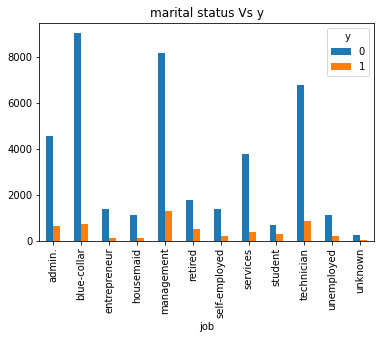

In [28]:
xy.plot(x='job',kind='bar',title='marital status Vs y')

In [29]:
xy=df.groupby(['marital','y'])['y'].count().unstack().reset_index()

In [30]:
xy

y,marital,0,1
0,divorced,4585,622
1,married,24459,2755
2,single,10878,1912


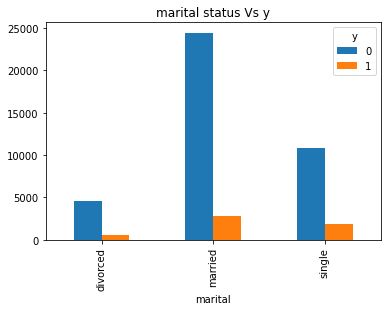

In [31]:
xy.plot(x='marital',kind='bar',title='marital status Vs y')

In [32]:
xy=df.groupby(['education','y'])['y'].count().unstack().reset_index()

In [33]:
xy

y,education,0,1
0,primary,6260,591
1,secondary,20752,2450
2,tertiary,11305,1996
3,unknown,1605,252


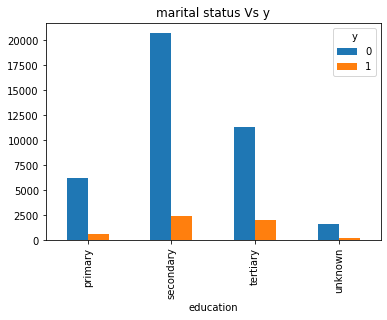

In [34]:
xy.plot(x='education',kind='bar',title='marital status Vs y')

In [35]:
xy=df.groupby(['contact','y'])['y'].count().unstack().reset_index()

In [36]:
xy

y,contact,0,1
0,cellular,24916,4369
1,telephone,2516,390
2,unknown,12490,530


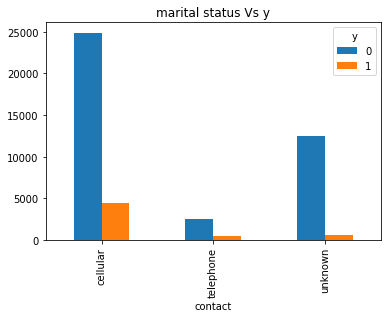

In [37]:
xy.plot(x='contact',kind='bar',title='marital status Vs y')

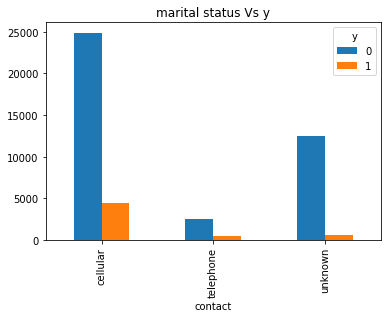

In [38]:
xy.plot(x='contact',kind='bar',title='marital status Vs y')

In [39]:
xy=df.groupby(['month','y'])['y'].count().unstack().reset_index()

In [40]:
xy

y,month,0,1
0,apr,2355,577
1,aug,5559,688
2,dec,114,100
3,feb,2208,441
4,jan,1261,142
5,jul,6268,627
6,jun,4795,546
7,mar,229,248
8,may,12841,925
9,nov,3567,403


In [41]:
month_dict = {'jan':1,'feb':2,'mar':3, 'apr':4, 'may':5, 'jun':6, 'jul':7, 'aug':8, 'sep':9, 'oct':10, 'nov':11, 'dec':12}

In [42]:
xy=xy.sort_values('month', key = lambda x : x.apply (lambda x : month_dict[x]))

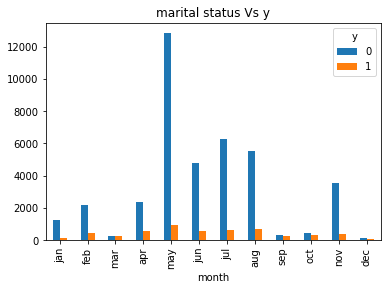

In [43]:
xy.plot(x='month',kind='bar',title='marital status Vs y')

Understanding the numerical values

In [44]:
xy=df.groupby(['age','y'])['y'].count().unstack().reset_index()

In [45]:
xy

y,age,0,1
0,18,5.0,7.0
1,19,24.0,11.0
2,20,35.0,15.0
3,21,57.0,22.0
4,22,89.0,40.0
...,...,...,...
72,90,NaN,2.0
73,92,NaN,2.0
74,93,NaN,2.0
75,94,1.0,NaN


In [46]:
xy = xy.fillna(0,axis=0)

In [47]:
xy

y,age,0,1
0,18,5.0,7.0
1,19,24.0,11.0
2,20,35.0,15.0
3,21,57.0,22.0
4,22,89.0,40.0
...,...,...,...
72,90,0.0,2.0
73,92,0.0,2.0
74,93,0.0,2.0
75,94,1.0,0.0


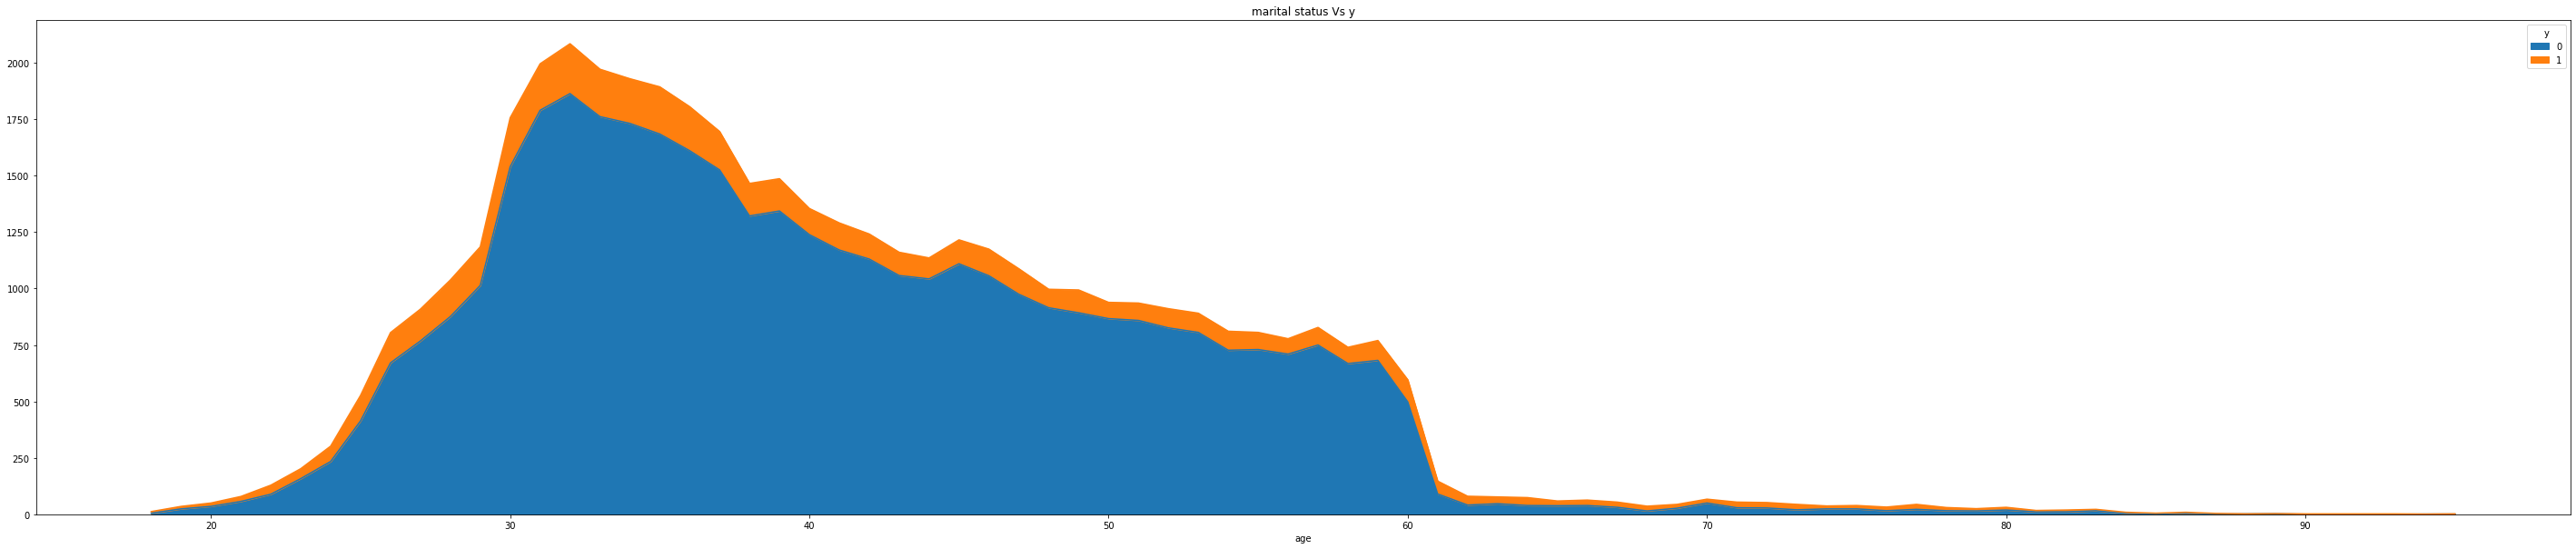

In [48]:
xy.plot(x='age',kind='area',title='marital status Vs y',figsize=(50,10))

In [49]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,1
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,1
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,1
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,0


In [50]:
xy=df.loc[df['y']==0]

In [51]:
xy

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45194,59,management,married,tertiary,no,138,yes,yes,cellular,16,nov,162,2,187,5,failure,0
45198,37,management,married,tertiary,no,1428,no,no,cellular,16,nov,333,2,-1,0,unknown,0
45199,34,blue-collar,single,secondary,no,1475,yes,no,cellular,16,nov,1166,3,530,12,other,0
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,0


In [52]:
xy['balance']

0        2143
1          29
2           2
3        1506
4           1
         ... 
45194     138
45198    1428
45199    1475
45209     668
45210    2971
Name: balance, Length: 39922, dtype: int64

In [53]:
xy['balance'].describe()

count     39922.000000
mean       1303.714969
std        2974.195473
min       -8019.000000
25%          58.000000
50%         417.000000
75%        1345.000000
max      102127.000000
Name: balance, dtype: float64

In [54]:
xy=df.loc[df['y']==1]

In [55]:
xy

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
83,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,1
86,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,1
87,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,1
129,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,1
168,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45204,73,retired,married,secondary,no,2850,no,no,cellular,17,nov,300,1,40,8,failure,1
45205,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,386,2,-1,0,unknown,1
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,1
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,1


In [56]:
xy['balance'].describe()

count     5289.000000
mean      1804.267915
std       3501.104777
min      -3058.000000
25%        210.000000
50%        733.000000
75%       2159.000000
max      81204.000000
Name: balance, dtype: float64

In [57]:
xy=df.loc[df['y']==0]

In [58]:
xy['duration'].describe()

count    39922.000000
mean       221.182806
std        207.383237
min          0.000000
25%         95.000000
50%        164.000000
75%        279.000000
max       4918.000000
Name: duration, dtype: float64

In [59]:
xy=df.loc[df['y']==1]
xy['duration'].describe()

count    5289.000000
mean      537.294574
std       392.525262
min         8.000000
25%       244.000000
50%       426.000000
75%       725.000000
max      3881.000000
Name: duration, dtype: float64